<a href="https://colab.research.google.com/github/cvs2010/machine_learning_image_recog/blob/main/imagerecognition_binary_catdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando a biblioteca do Python TensorFlow (Machine Learning):
TensorFlow é uma biblioteca de código-fonte aberto amigável para Python para computação numérica que torna o aprendizado de máquina mais rápido e fácil.

In [317]:
import tensorflow as tf

In [318]:
%tensorflow_version 2.1

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [319]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [320]:
!nvidia-smi

Sat Apr 15 20:46:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    28W /  70W |   5091MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Importando a biblioteca keras (DeepLearning) do TensorFlow: Keras é uma biblioteca aberta de Deep Learning implementada utilizando TensorFlow para diversas linguagens/plataformas, como Python e R, como foco na sua facilidade para utilização. Ela permite modelar e treinar modelos de redes neurais com poucas linhas de código.

In [321]:
from keras.preprocessing import image

In [322]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

A Biblioteca OS é muito utilizada para fazer automação de processos no Python, então você pode fazer algumas automações

O NumPy é uma biblioteca para a linguagem Python com funções para se trabalhar com computação numérica. Seu principal objeto é o vetor n-dimensional, ou ndarray . Um vetor n-dimensional também é conhecido pelo nome tensor.

O Matplotlib é uma biblioteca Python frequentemente utilizada para ciência de dados. A ferramenta de código aberto oferece recursos de plotagem para a criação de gráficos 2D e 3D com visualizações estáticas, animadas e interativas.

In [323]:
import os
import matplotlib.pyplot as plt
import numpy as np

Biblioteca utilizada para criar "logs" de Erros na execução do código

In [324]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Importação do URL com as imagens para análise do MachineLearning

In [325]:
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cat

cats_and_dogs
|__ train
    |__ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |__ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ validation
    |__ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |__ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
|__ test: [1.jpg, 2.jpg, 3.jpg ...]


Buscar o diretório com o arquivo ZIP das imagens e buscar por tipo de arquivo realizando um print

Segregando os diretórios Base, Treino, Validação e TESTE para leitura do MachineLearning

In [326]:
base_dir = os.path.join(os.path.dirname(PATH), 'cats_and_dogs')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test') #directory of test pictures

train_cats_dir = os.path.join(train_dir, 'cats') #directory of training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') #directory of training cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') #directory of validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') #directory of validation cat pictures

Criando as variáveis para identificar os diretórios

In [327]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

num_test = len(os.listdir(test_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
total_test = num_test

'Printando' o total do treino e da validação de imagens

In [328]:
print('total training cat images', num_cats_tr)
print('total training dog images', num_dogs_tr)

print('total validation cat images', num_cats_tr)
print('total validation dog images', num_dogs_tr)
print('--')
print('total training images', total_train)
print('total validation images', total_val)
print('total test images', total_test)

total training cat images 1000
total training dog images 1000
total validation cat images 1000
total validation dog images 1000
--
total training images 2000
total validation images 1000
total test images 51


Número de exemplos de formação a processar antes de actualizar as variáveis dos modelos.
Os dados de formação consistem em largura e altura das imagens de 150 pixels

In [329]:
BATCH_SIZE = 100 # Number of training examples to process before updating model's variables
IMG_SHAPE = 150 # Training data consists of image's width and height of 150 pixels

Ajustando a escala do Gerador

In [330]:
train_image_generator = ImageDataGenerator(rescale=1./255)   # Generator for training data
validation_image_generator = ImageDataGenerator(rescale=1./255)   # Generator for validation data
test_image_generator = ImageDataGenerator(rescale=1./255)   # Generator for validation data

In [331]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #150 x 150 px
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [332]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #150 x 150 px
                                                           class_mode='binary')

Found 1000 images belonging to 2 classes.


In [333]:
val_test_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=PATH,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #150 x 150 px
                                                           classes=['test'])

Found 50 images belonging to 1 classes.


In [334]:
sample_training_images, _ = next(train_data_gen)

In [335]:
#The `plotImages` function will be used a few times to plot images. It takes an array of images and a probabilities list,
# although the probabilities list is optional. This code is given to you. If you created the `train_data_gen` variable correctly,
#then running the cell below will plot five random training images.
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

In [336]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])


Parâmetros de ajuste da acurácia

In [337]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Apresentar os resultados da acurácia e perda do código

In [338]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 17, 17, 128)     

In [339]:
EPOCHS = 30
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
)

<ipython-input-339-6b3b4bf5b8ab>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
20/20 [==============================] - 13s 579ms/step - loss: 0.7590 - accuracy: 0.4970 - val_loss: 0.6892 - val_accuracy: 0.5450
Epoch 2/15
20/20 [==============================] - 9s 440ms/step - loss: 0.6907 - accuracy: 0.5225 - val_loss: 0.6884 - val_accuracy: 0.6100
Epoch 3/15
20/20 [==============================] - 10s 476ms/step - loss: 0.6783 - accuracy: 0.5685 - val_loss: 0.6445 - val_accuracy: 0.6420
Epoch 4/15
20/20 [==============================] - 10s 525ms/step - loss: 0.6411 - accuracy: 0.6165 - val_loss: 0.6059 - val_accuracy: 0.6720
Epoch 5/15
20/20 [==============================] - 11s 551ms/step - loss: 0.5990 - accuracy: 0.6625 - val_loss: 0.7449 - val_accuracy: 0.5760
Epoch 6/15
20/20 [==============================] - 10s 489ms/step - loss: 0.5857 - accuracy: 0.6820 - val_loss: 0.5935 - val_accuracy: 0.6740
Epoch 7/15
20/20 [==============================] - 10s 498ms/step - loss: 0.5143 - accuracy: 0.7415 - val_loss: 0.5661 - val_accuracy: 0.7080


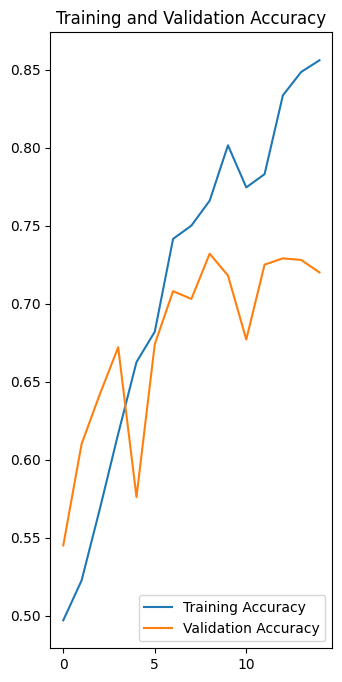

In [340]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.savefig('./foo.png')
plt.show()

Agora é hora de usar o seu modelo para prever se uma nova imagem é um gato ou um cachorro.
Nesta célula final, temos a probabilidade de cada imagem de teste (`test_data_gen`) ser um cão ou um gato. As 'probabilidades' devem ser uma lista de inteiros. 
Chamamos a função `plotImages` e passamos as imagens de teste e as probabilidades correspondentes a cada imagem de teste.
Depois de executar a célula, teremos todas as 50 imagens de teste com uma etiqueta mostrando a percentagem de certeza de que a imagem é um gato ou um cão. A exatidão corresponderá a exatidão mostrada no gráfico acima (depois de executar a célula anterior). Mais imagens de treino podem levar a uma maior precisão.

1/1 [==============================] - 0s 155ms/step


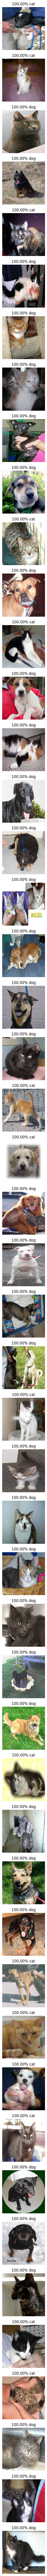

Your model correctly identified 62.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!


In [348]:
test_images, _ = next(val_test_gen)
probabilities = (model.predict(val_test_gen) > 0.5).any(axis=1).astype("int32").flatten()
plotImages(test_images, probabilities=probabilities)

# Run this final cell to see if you passed the challenge or if you need to keep trying.

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = (percentage_identified) > 0.63

print(f"Your model correctly identified {(percentage_identified)*100}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Salva o modelo treinado no caminhodo GoogleDrive: /content/drive/MyDrive/Colab Notebooks/Saved Models/

Nas seguintes extensões: .json .h5 .hdf5

In [342]:
# caminho para o diretório desejado
save_path = '/content/drive/MyDrive/Colab Notebooks/Saved Models/'

# serialize model to JSON
model_json = model.to_json()

# verifique se o diretório existe, crie-o se necessário
if not os.path.exists(save_path):
    os.makedirs(save_path)

# salve o arquivo no diretório especificado
with open(os.path.join(save_path, "modelo.json"), "w") as json_file:
    json_file.write(model_json)
print("Saved modelo.json to disk")

Saved modelo.json to disk


In [343]:
# serialize weights to H5
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Saved Models/modelo.h5')
print("Saved modelo.h5 to disk")

Saved modelo.h5 to disk


In [344]:
# serialize weights to HDF5
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Saved Models/modelo.hdf5')
print("Saved modelo.hdf5 to disk")

Saved modelo.hdf5 to disk
